# Natural Language Processing
NLTK - 

In [1]:
import nltk

In [2]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
s = '''Python is an interpreted high-level general-purpose programming language. Its design philosophy emphasizes code readability with its use of significant indentation. Its language constructs as well as its object-oriented approach aim to help programmers write clear, logical code for small and large-scale projects.[31]
Python is dynamically-typed and garbage-collected. It supports multiple programming paradigms, including structured (particularly, procedural), object-oriented and functional programming. It is often described as a "batteries included" language due to its comprehensive standard library.[32][33]
Guido van Rossum began working on Python in the late 1980s, as a successor to the ABC programming language, and first released it in 1991 as Python 0.9.0.[34] Python 2.0 was released in 2000 and introduced new features, such as list comprehensions and a cycle-detecting garbage collection system (in addition to reference counting). Python 3.0 was released in 2008 and was a major revision of the language that is not completely backward-compatible. Python 2 was discontinued with version 2.7.18 in 2020.[35]
Python consistently ranks as one of the most popular programming languages.'''

In [5]:
import pandas as pd

In [8]:
df = pd.read_csv('SMSSpamCollection.tsv', sep='\t', names=['type','message'])

In [9]:
df.head()

,type,message
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5568 entries, 0 to 5567
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   type     5568 non-null   object
 1   message  5568 non-null   object
dtypes: object(2)
memory usage: 87.1+ KB


In [10]:
df.describe()

,type,message
count,5568,5568
unique,2,5165
top,ham,"Sorry, I'll call later"
freq,4822,30


In [12]:
df.groupby('type').describe()

message                                                               
       count unique                                                top freq
type                                                                       
ham     4822   4513                             Sorry, I'll call later   30
spam     746    652  Please call our customer service representativ...    4

In [15]:
len(df['message'][0])

196

In [18]:
df['length'] = df['message'].str.len()

In [19]:
df.head()

,type,message,length
0,ham,I've been searching for the right words to tha...,196
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
2,ham,"Nah I don't think he goes to usf, he lives aro...",61
3,ham,Even my brother is not like to speak with me. ...,77
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,35


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
sns.set_style('whitegrid')
sns.set_palette('Set1')

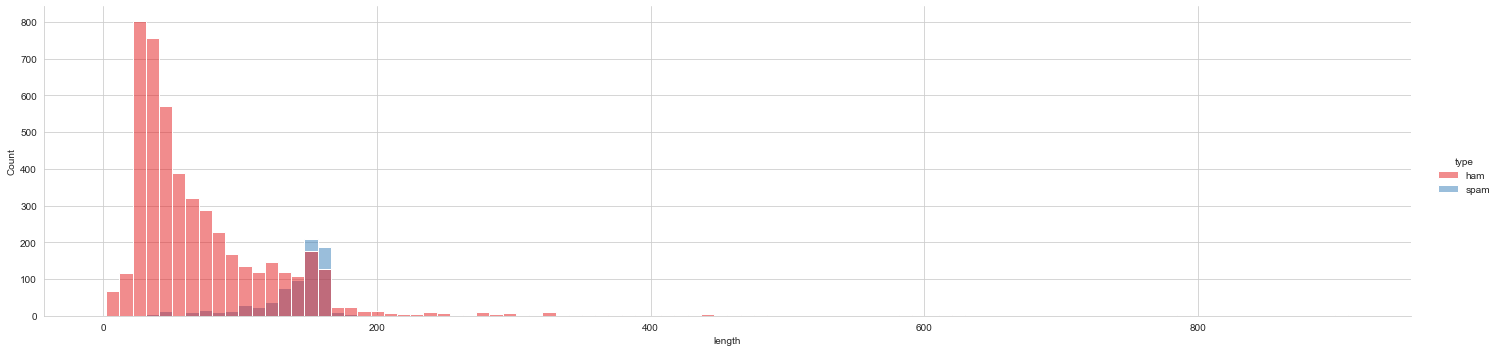

In [27]:
s = sns.displot(x='length', data=df, hue='type',aspect=4)

In [28]:
df['length'].argmax()

1081

In [29]:
df['length'].max()

910

In [30]:
df['message'][1081]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [33]:
df.sort_values(by='length',ascending=False).head(20)

,type,message,length
1081,ham,For me the love should start with attraction.i...,910
1859,ham,The last thing i ever wanted to do was hurt yo...,790
2430,ham,Indians r poor but India is not a poor country...,629
1575,ham,How to Make a girl Happy? It's not at all diff...,611
2845,ham,Sad story of a Man - Last week was my b'day. M...,588
2154,ham,Sad story of a Man - Last week was my b'day. M...,588
2376,ham,"Good evening Sir, hope you are having a nice d...",482
3013,ham,"&lt;#&gt; is fast approaching. So, Wish u a v...",461
1509,ham,"Hey sweet, I was wondering when you had a mome...",458
5100,ham,A Boy loved a gal. He propsd bt she didnt mind...,446


In [34]:
sample = df['message'][1859]

In [35]:
sample

"The last thing i ever wanted to do was hurt you. And i didn't think it would have. You'd laugh, be embarassed, delete the tag and keep going. But as far as i knew, it wasn't even up. The fact that you even felt like i would do it to hurt you shows you really don't know me at all. It was messy wednesday, but it wasn't bad. The problem i have with it is you HAVE the time to clean it, but you choose not to. You skype, you take pictures, you sleep, you want to go out. I don't mind a few things here and there, but when you don't make the bed, when you throw laundry on top of it, when i can't have a friend in the house because i'm embarassed that there's underwear and bras strewn on the bed, pillows on the floor, that's something else. You used to be good about at least making the bed."

In [43]:
from nltk.corpus import stopwords as sw
from string import punctuation as punc

In [45]:
punc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [44]:
sw.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [70]:
def text_preprocess(txt):
    sentences = nltk.sent_tokenize(txt.lower())
    words = []
    for sentence in sentences:
        s = ' '.join(i for i in sentence.split() if i not in sw.words('english'))
        words += [i.strip("'") for i in nltk.word_tokenize(s) if i not in sw.words('english') and i not in punc]
    return words
#     jw = ' '.join(words)
#     jw = ''.join( i for i in jw if i.isalpha() or i==' ')
#     return jw

In [58]:
text_preprocess(sample)

['last',
 'thing',
 'ever',
 'wanted',
 'hurt',
 'think',
 'would',
 'laugh',
 'embarassed',
 'delete',
 'tag',
 'keep',
 'going',
 'far',
 'knew',
 'even',
 'fact',
 'even',
 'felt',
 'like',
 'would',
 'hurt',
 'shows',
 'really',
 'know',
 'messy',
 'wednesday',
 'bad',
 'problem',
 'time',
 'clean',
 'choose',
 'skype',
 'take',
 'pictures',
 'sleep',
 'want',
 'go',
 'mind',
 'things',
 'make',
 'bed',
 'throw',
 'laundry',
 'top',
 'ca',
 "n't",
 'friend',
 'house',
 'm',
 'embarassed',
 's',
 'underwear',
 'bras',
 'strewn',
 'bed',
 'pillows',
 'floor',
 's',
 'something',
 'else',
 'used',
 'good',
 'least',
 'making',
 'bed']

In [46]:
"n't" in sw.words('english')

False

In [47]:
'we' in sw.words('english')

True

In [59]:
tp = df['message'].apply(text_preprocess)

In [61]:
tp.head()

0    [ve, searching, right, words, thank, breather,...
1    [free, entry, 2, wkly, comp, win, fa, cup, fin...
2       [nah, think, goes, usf, lives, around, though]
3    [even, brother, like, speak, treat, like, aids...
4                                       [date, sunday]
Name: message, dtype: object

In [62]:
from sklearn.feature_extraction.text import CountVectorizer

In [63]:
cv = CountVectorizer()

In [65]:
bow = cv.fit_transform(tp.apply(lambda x: ' '.join(x)))
# bow = cv.fit_transform(tp)

In [67]:
bow

<5568x8642 sparse matrix of type '<class 'numpy.int64'>'
	with 48093 stored elements in Compressed Sparse Row format>

In [68]:
bow_df = pd.DataFrame(bow.toarray(), columns = cv.get_feature_names())

In [69]:
bow_df.head()

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
bow_df.sum()

00              10
000             29
000pes           1
008704050406     2
0089             1
                ..
zouk             1
zyada            1
èn               1
ú1               1
〨ud              1
Length: 8642, dtype: int64

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [73]:
tfidf = TfidfVectorizer()

In [74]:
tfidf_data = tfidf.fit_transform(tp.apply(lambda x: ' '.join(x)))
# tfidf_data = tfidf.fit_transform(tp)

In [75]:
tfidf_df = pd.DataFrame(tfidf_data.toarray(), columns = tfidf.get_feature_names())

In [78]:
tfidf_df.sample(6)

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
3741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
tfidf_df.sum()

00              2.306842
000             6.845475
000pes          0.238604
008704050406    0.552678
0089            0.262052
                  ...   
zouk            0.280166
zyada           0.161336
èn              0.186193
ú1              0.226694
〨ud             0.348259
Length: 8642, dtype: float64

In [79]:
x = tfidf_df
y = df['type']

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=101)

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
model = RandomForestClassifier().fit(xtrain,ytrain)

In [84]:
model.score(xtest,ytest)*100

98.1149012567325